House Prices: Advanced Regression Techniques - Python Ensemble Learning實做 https://reurl.cc/Z9ajAW

1.建物面積：1stFlrSF(一樓面積)、GrLivArea(一樓以上總生活空間)、TotalBsmtSF(地下室總面積)等。

2.裝置數量：FullBath、Kitchen、Bedroom數量。

3.量表型類別特徵：ExterCond(外部狀態)、ExterQual(外觀材質)、GarageQual(車庫品質)等，這類型特徵的值為    Excellent/Good/Averege/Fair/Poor等具有順序特性。

4.一般類別特徵：Neighborhood(所在區域)、HouseStyle(房屋型式)等

5.日期相關特徵：YrSold(售出年度)、MoSold(售出月份)、GarageYrBlt(車庫建造年度)等。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
all_df = pd.concat([train_df,test_df]).reset_index(drop=True)

In [4]:
pd.set_option('display.max_columns',None)
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,

In [5]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


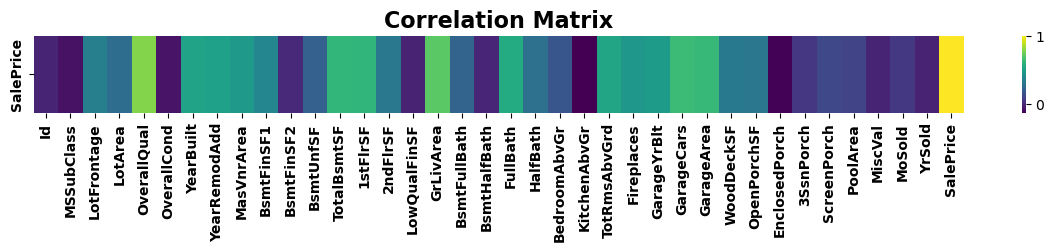

In [6]:
# First , look into int,float
num_train = train_df.select_dtypes(['int64','float64'])
train_corr = num_train.corr(numeric_only=True).drop('Id')
fig,ax = plt.subplots(figsize=(15,1))
sns.heatmap(train_corr.sort_values('SalePrice',ascending=False).head(1),cmap='viridis')
plt.title('Correlation Matrix',weight='bold',fontsize=16)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
print(train_corr['SalePrice'].sort_values(ascending=False).iloc[1:11])

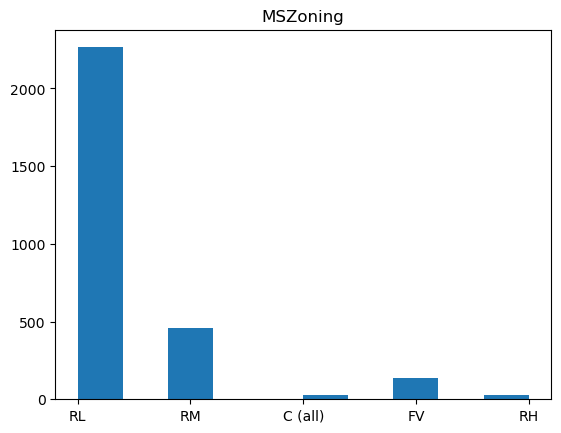

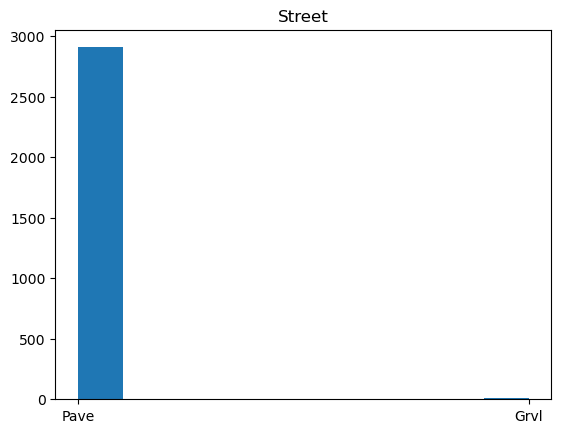

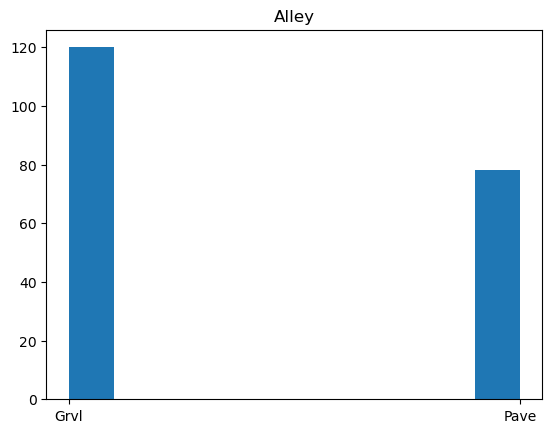

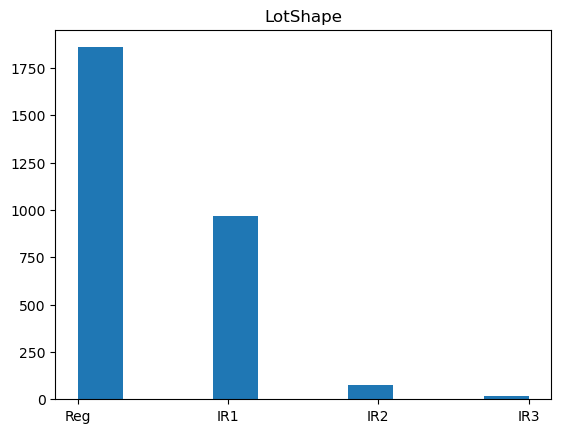

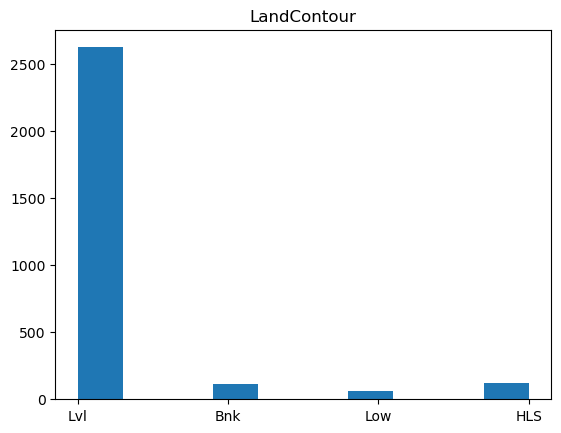

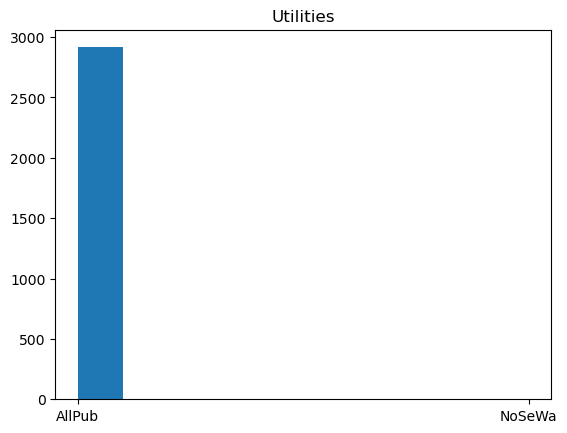

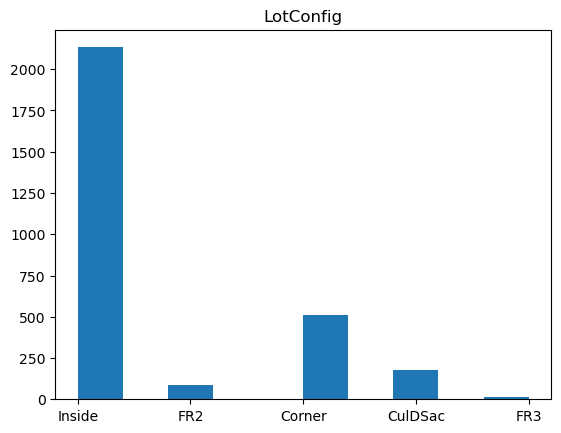

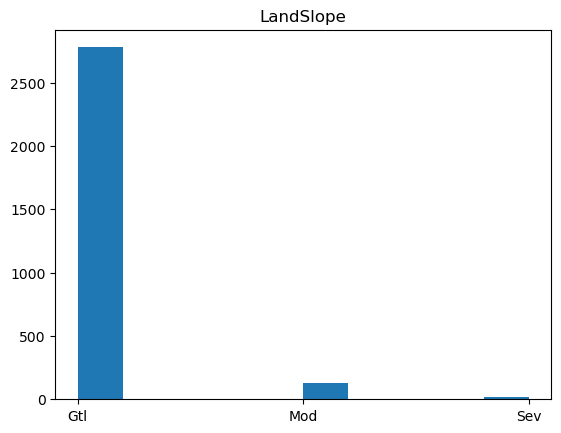

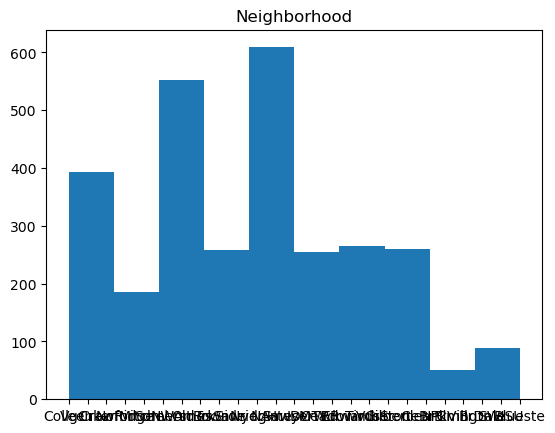

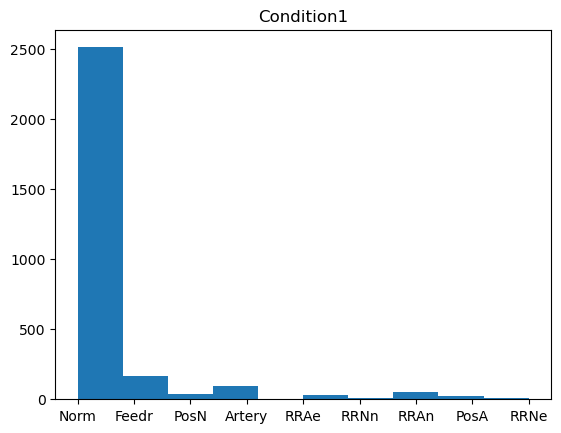

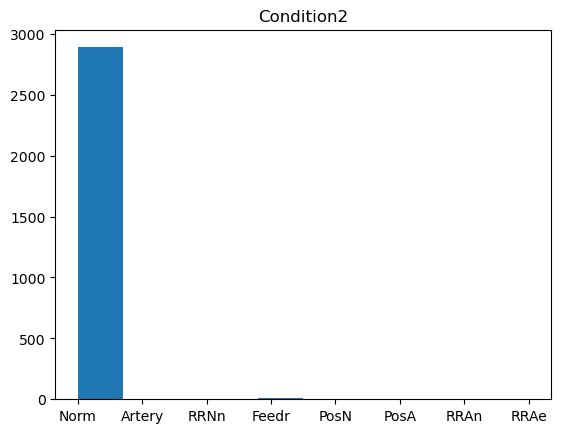

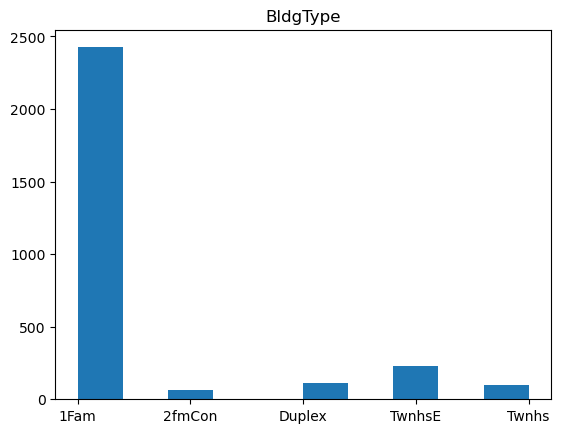

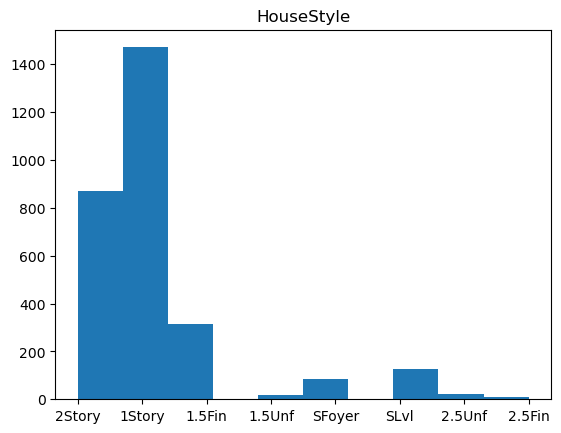

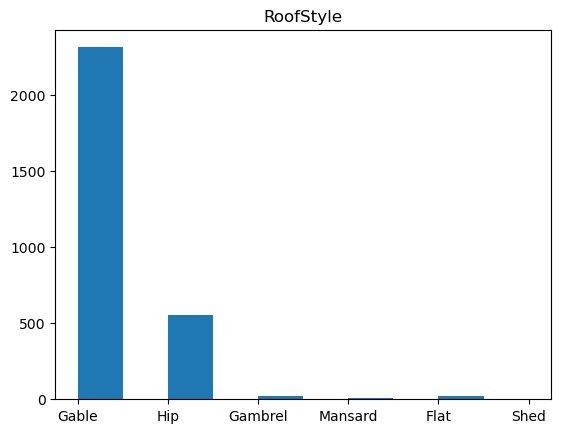

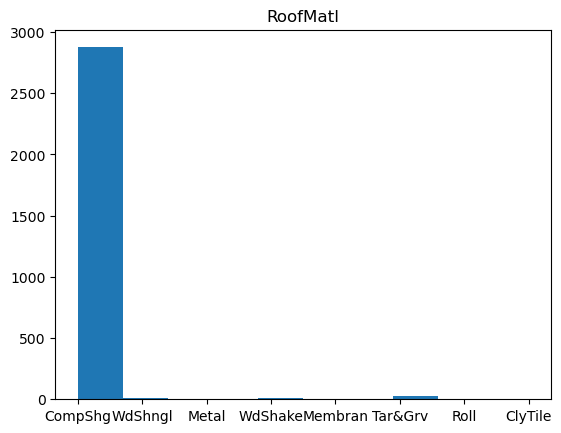

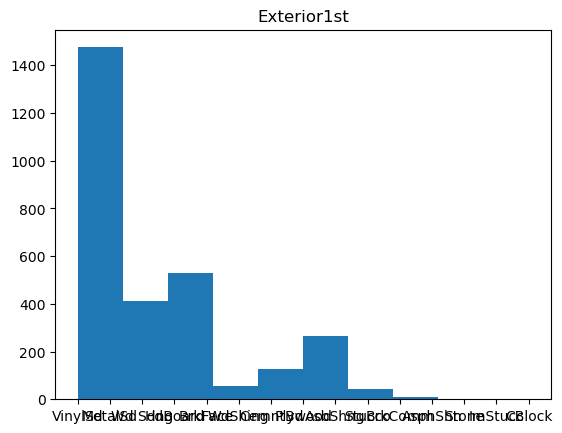

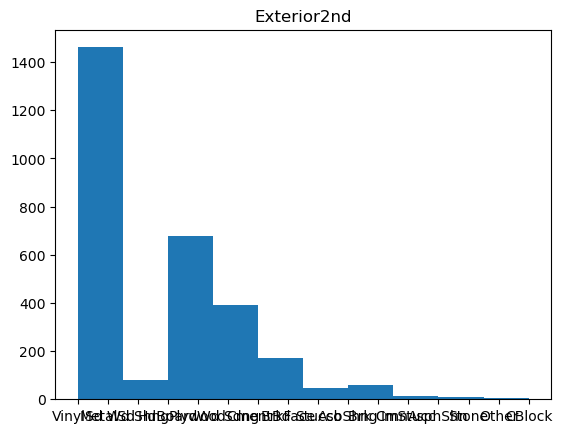

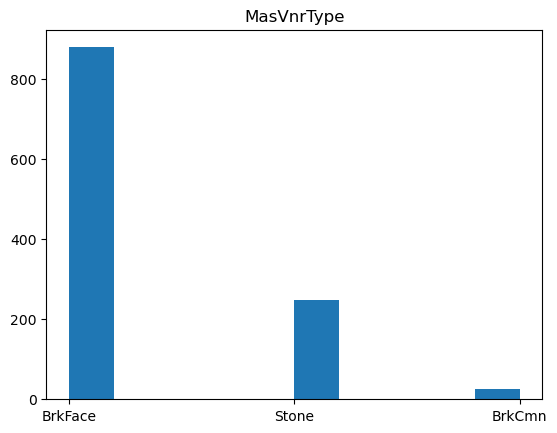

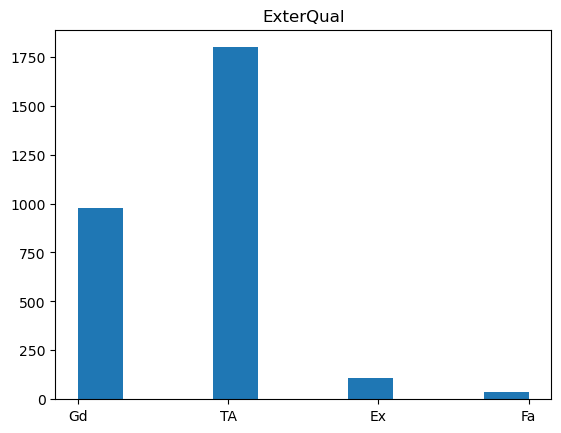

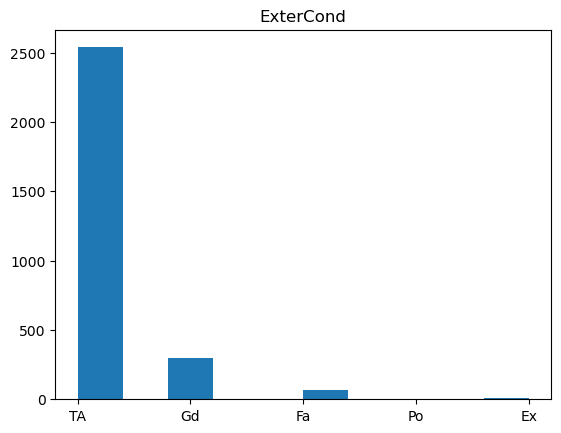

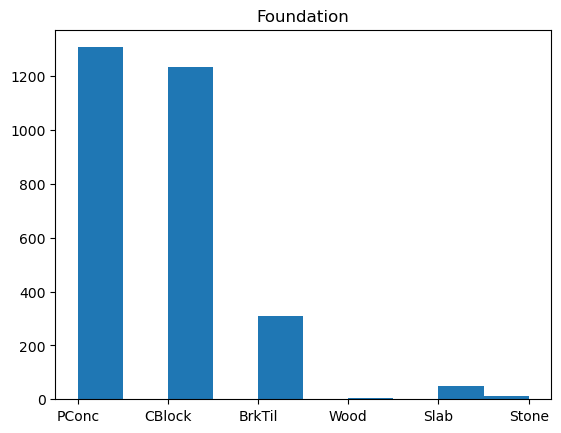

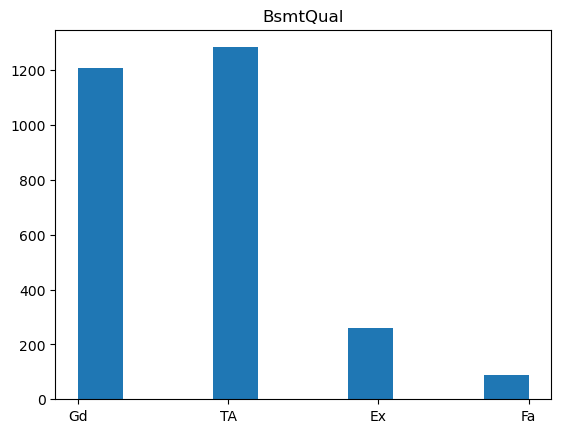

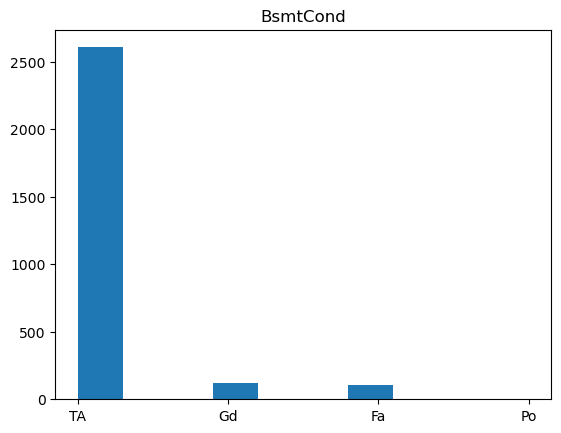

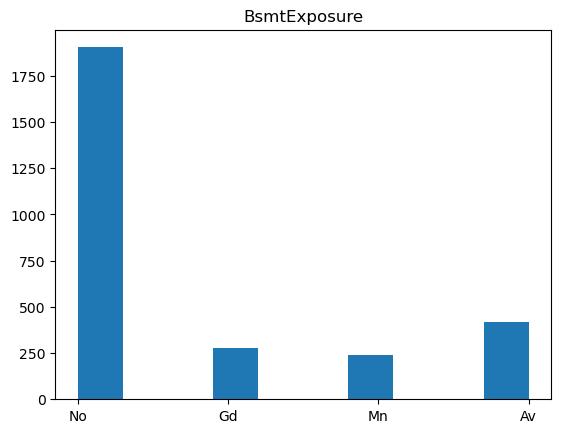

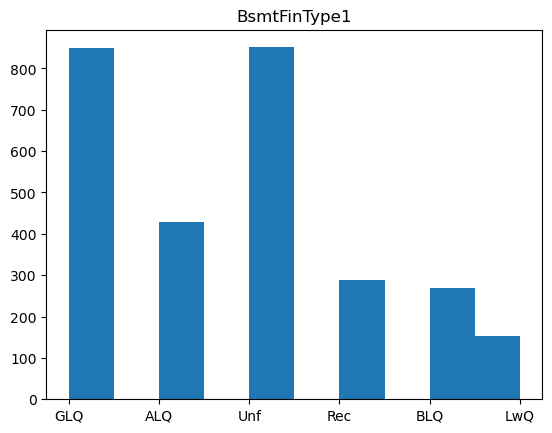

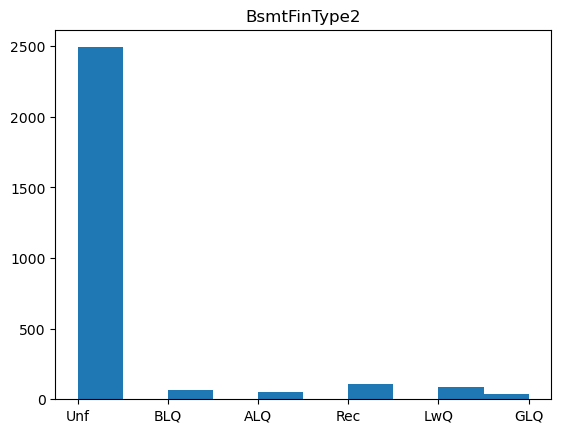

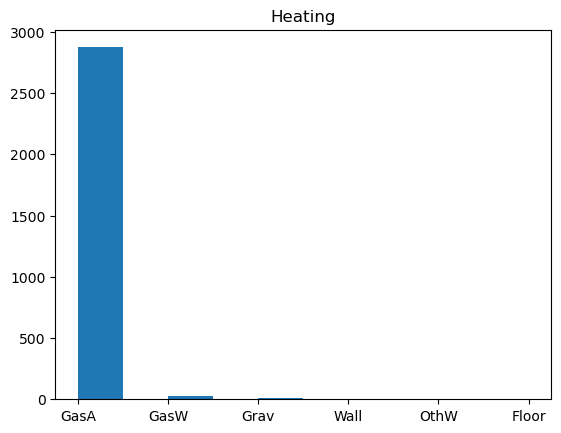

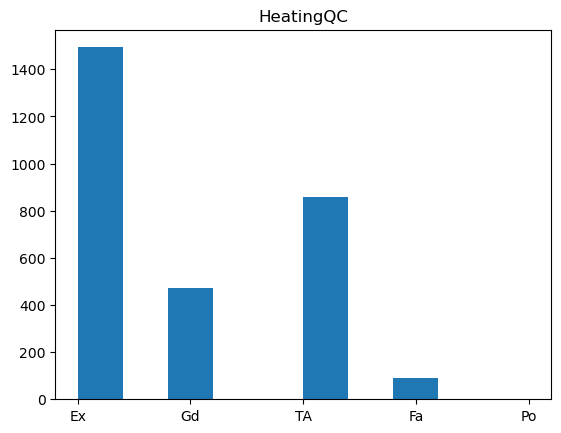

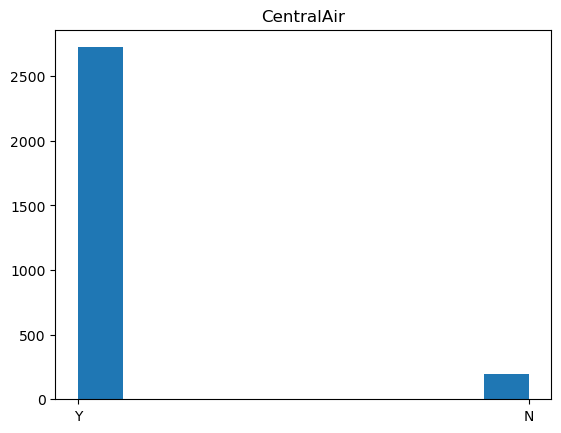

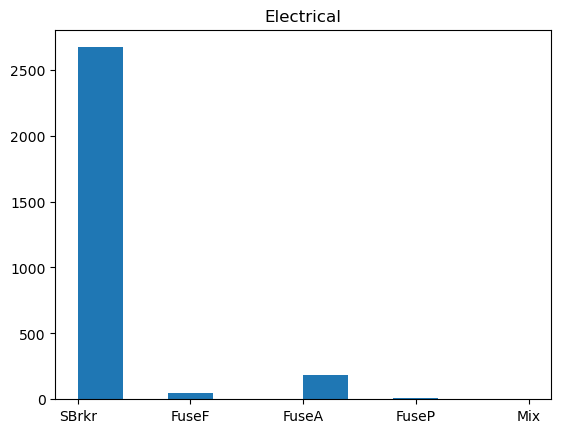

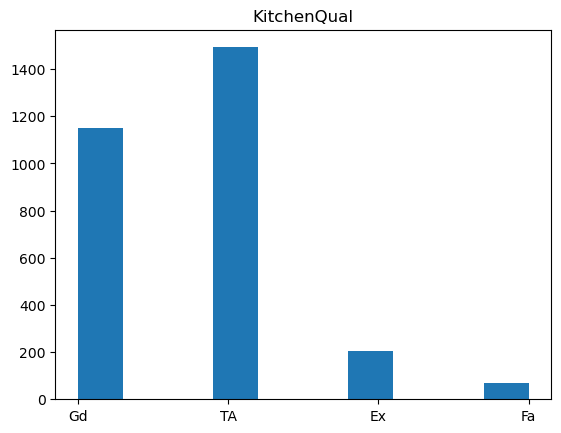

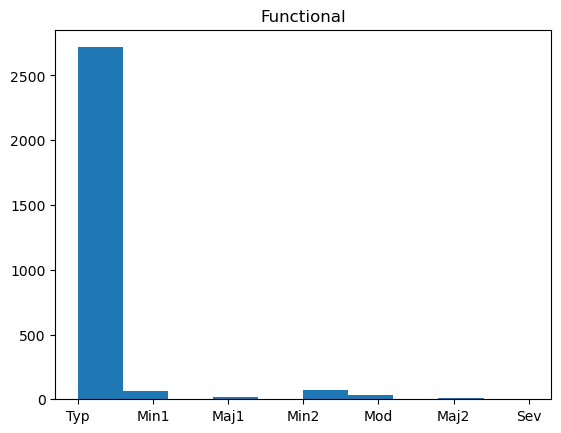

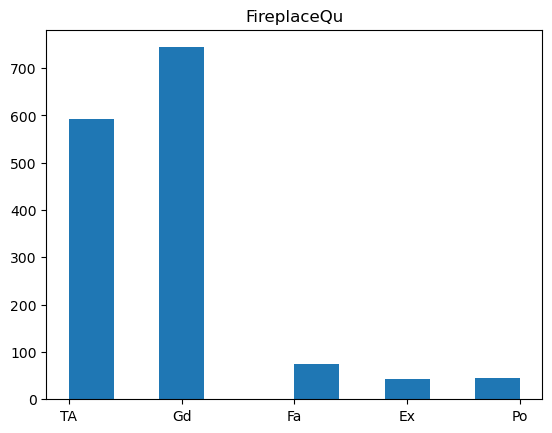

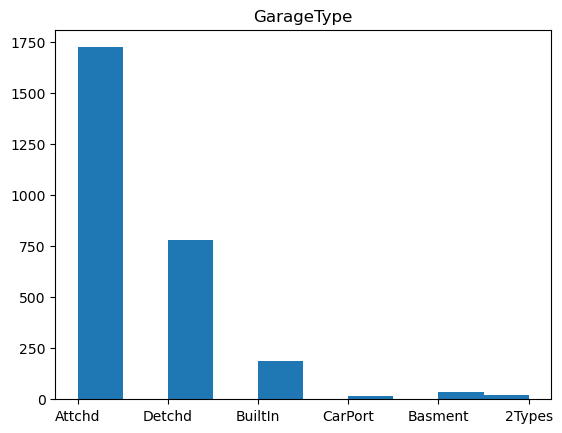

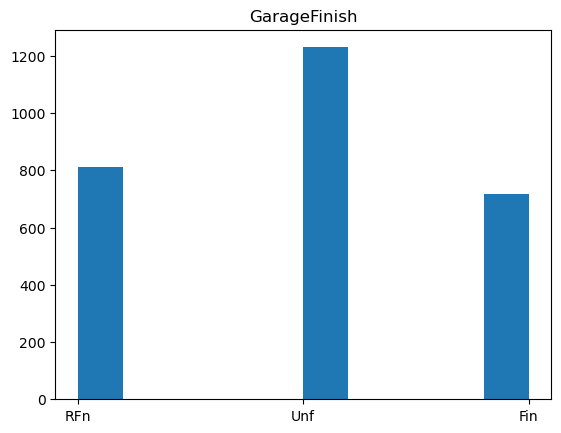

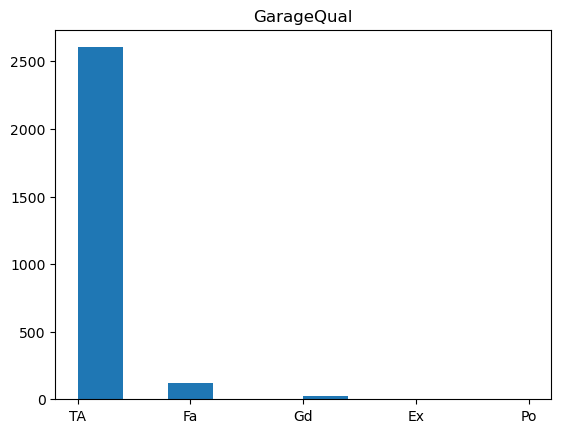

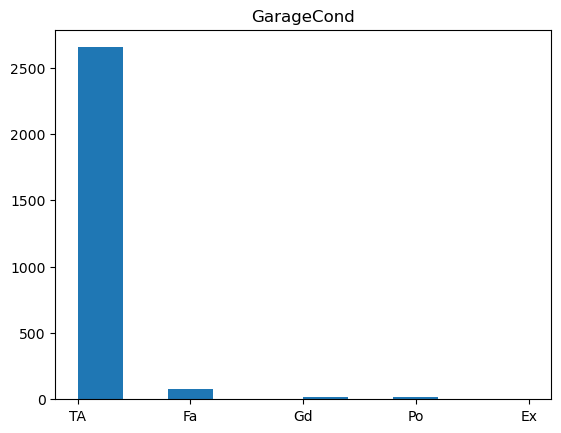

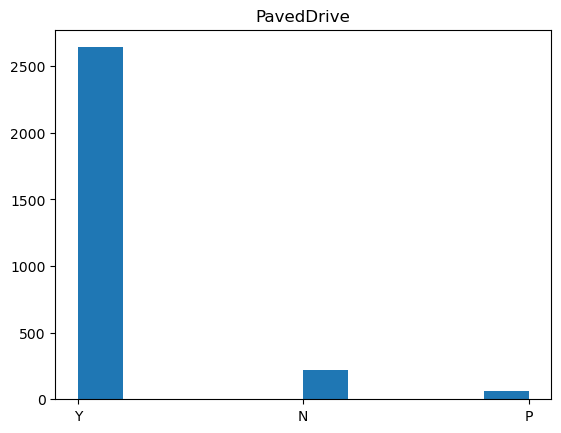

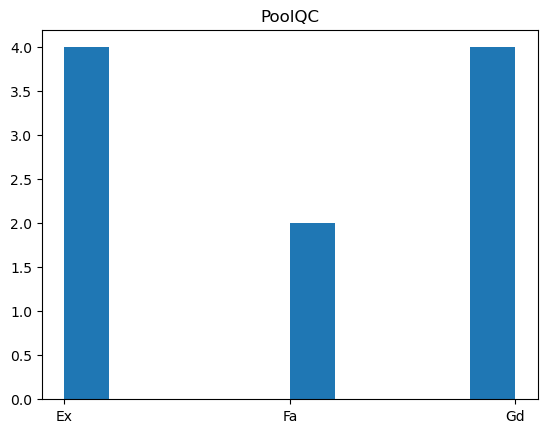

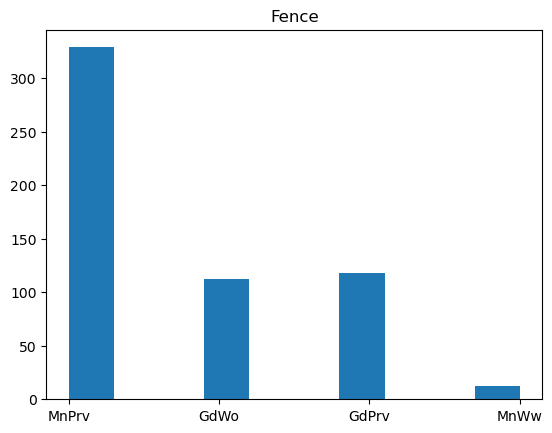

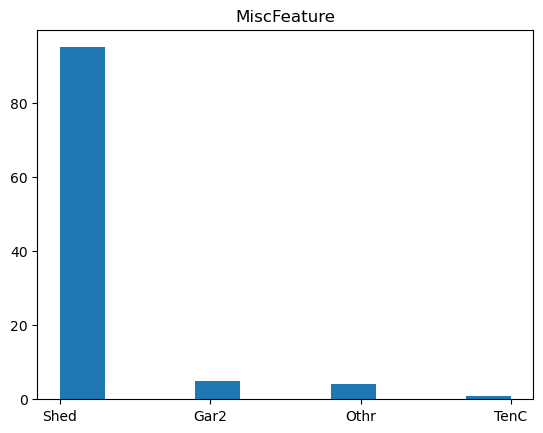

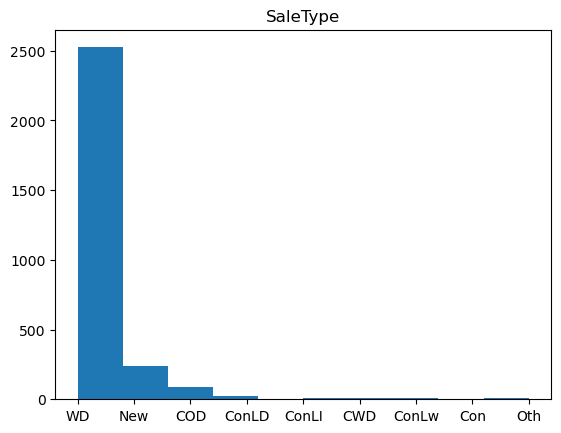

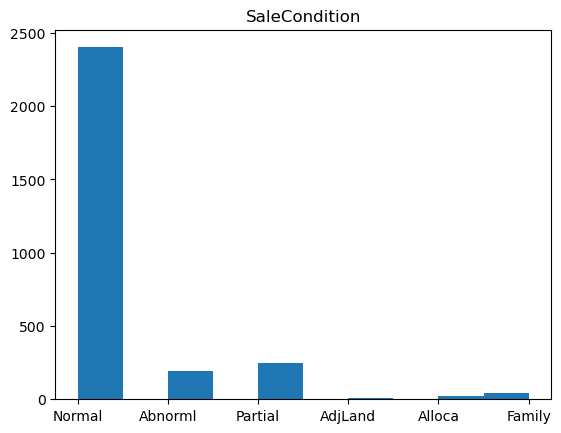

In [7]:
# look into all object data
object_df = all_df.select_dtypes(['object'])
for i in list(object_df.columns):
    fig,ax = plt.subplots()
    ax.hist(object_df[i].dropna())
    ax.set_title(i,fontsize=12,color='Black')
    plt.show()

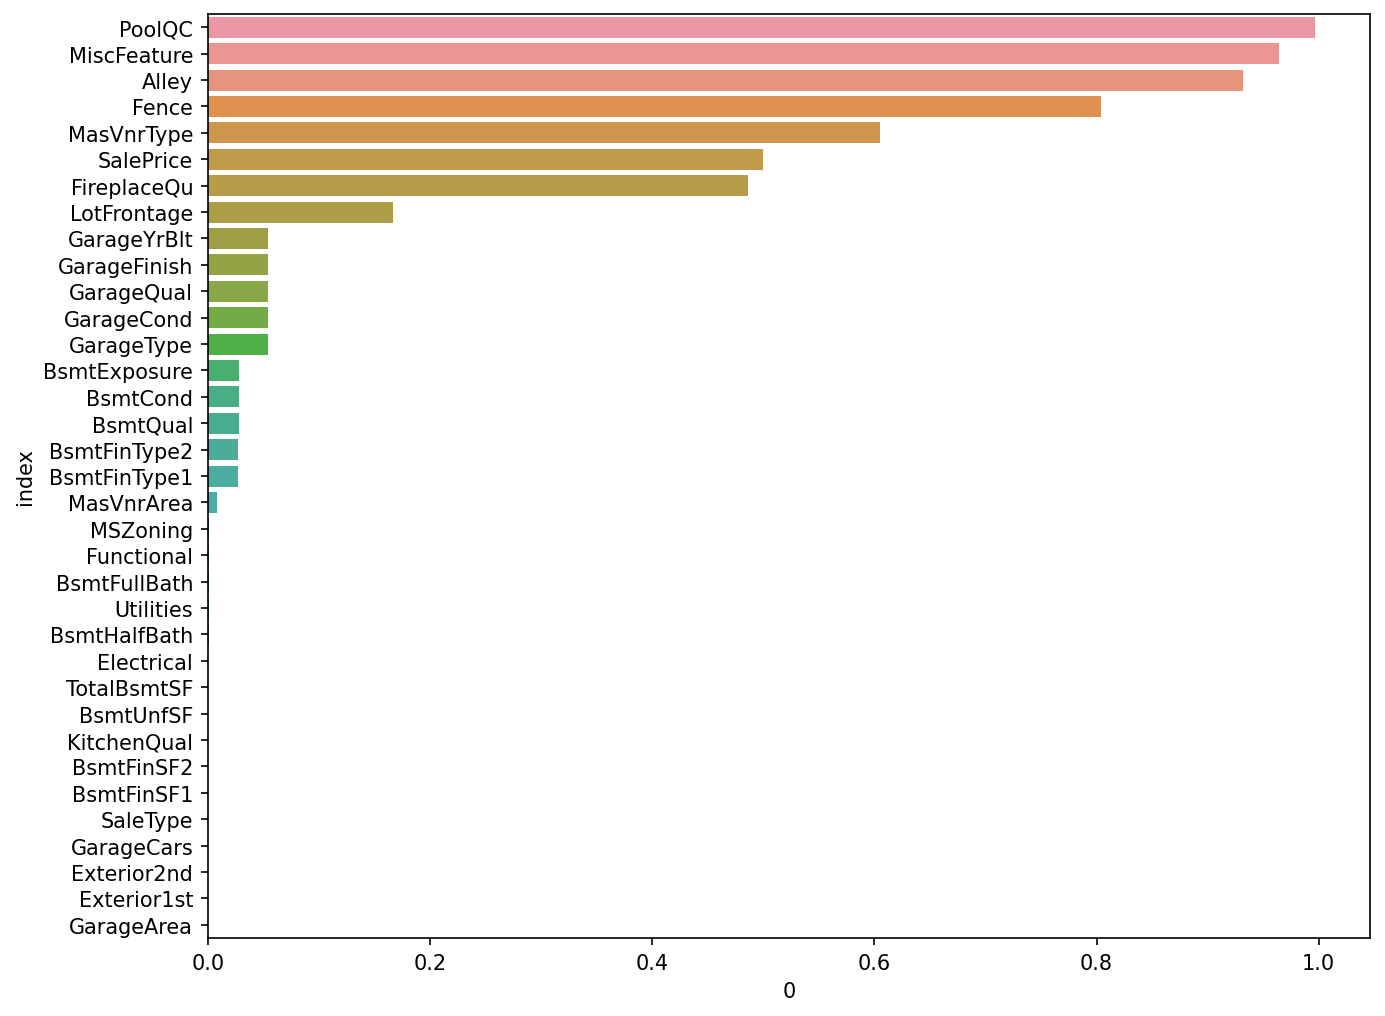

In [8]:
# check missing values
missing_values = all_df.isnull().mean().sort_values(ascending=False)
missing_values = missing_values[missing_values != 0].to_frame().reset_index()

plt.figure(figsize=(10,8),dpi=150)
sns.barplot(data=missing_values,x=0,y='index')
plt.show()

In [9]:
# 確認 定量與定性分類
quantitative = [f for f in all_df.columns if all_df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in all_df.columns if all_df.dtypes[f] == 'object']

In [10]:
# 定性
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [11]:
# 定量
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
# 排除特徵太單一(直方圖)與 Missing Values太多的值
# Missing Values特徵用 none補, 數值用 0補
all_df = all_df.drop(['Heating', 'RoofMatl', 'Condition2', 'Utilities', 'Street', 'PoolQC', 'MiscFeature', 
                      'Alley', 'Fence'],axis=1)

missing_feats = ['FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2',
                 'BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Functional',
                 'Exterior1st','KitchenQual','Exterior2nd','SaleType']

missing_num = ['LotFrontage','MasVnrArea','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','GarageArea','BsmtUnfSF',
               'BsmtFinSF2','GarageCars','BsmtFinSF1']

for i in missing_feats:
    all_df[i] = all_df[i].fillna('none')

for i in missing_num:
    all_df[i] = all_df[i].fillna(0)

all_df['GarageYrBlt'] = all_df['GarageYrBlt'].fillna(all_df['GarageYrBlt'].median())

In [13]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,none,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,none,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CemntBd,CmentBd,none,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,none,none,1979.0,none,0.0,0.0,none,none,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CemntBd,CmentBd,none,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,none,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,5,7,1960,1996,Gable,VinylSd,VinylSd,none,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,HdBoard,Wd Shng,none,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,none,none,1979.0,none,0.0,0.0,none,none,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,NaN


In [14]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  BldgType       2919 non-null   object 
 12  HouseStyle     2919 non-null   object 
 13  OverallQual    2919 non-null   int64  
 14  OverallCond    2919 non-null   int64  
 15  YearBuilt      2919 non-null   int64  
 16  YearRemodAdd   2919 non-null   int64  
 17  RoofStyle      2919 non-null   object 
 18  Exterior

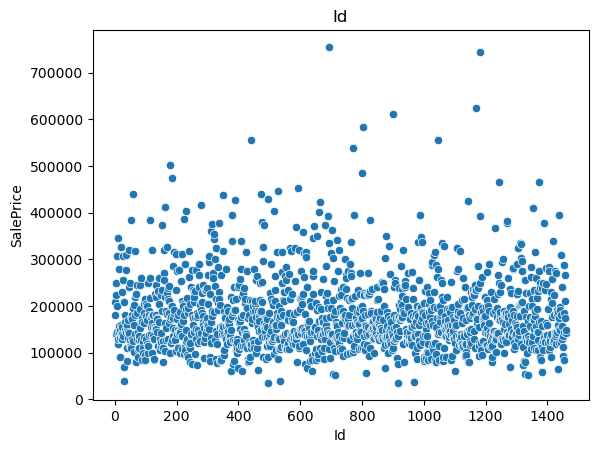

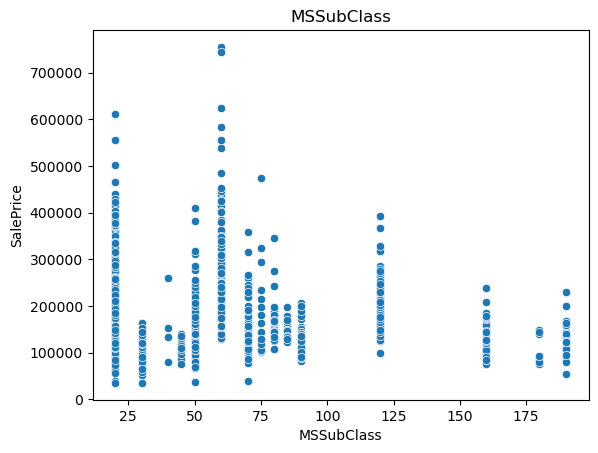

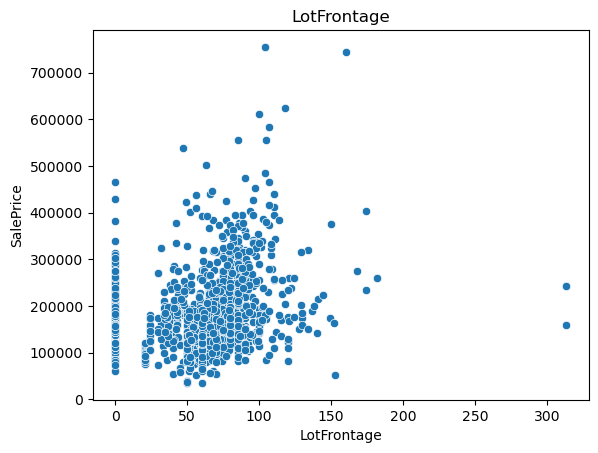

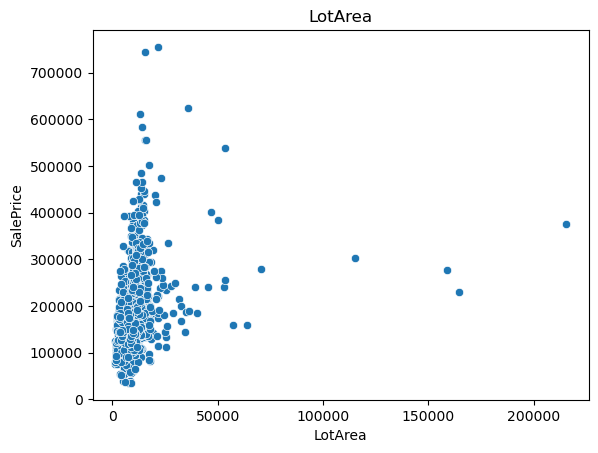

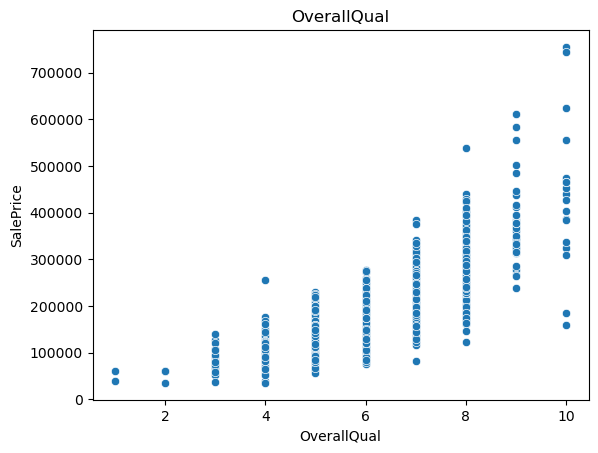

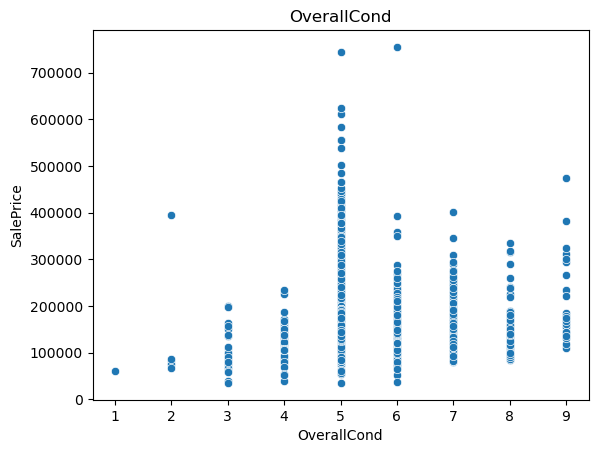

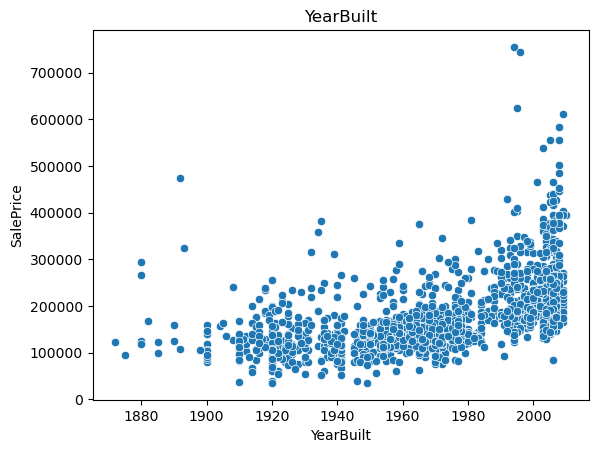

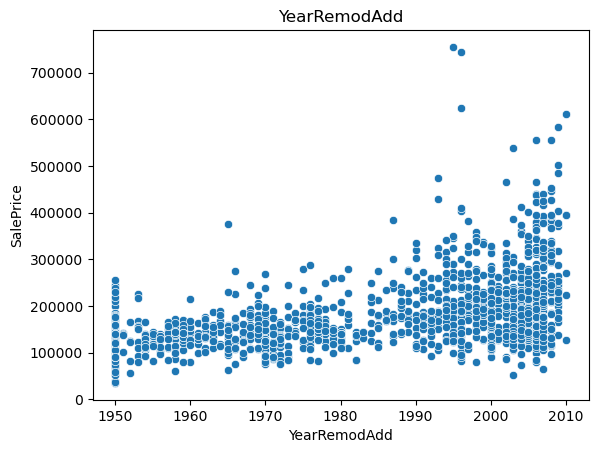

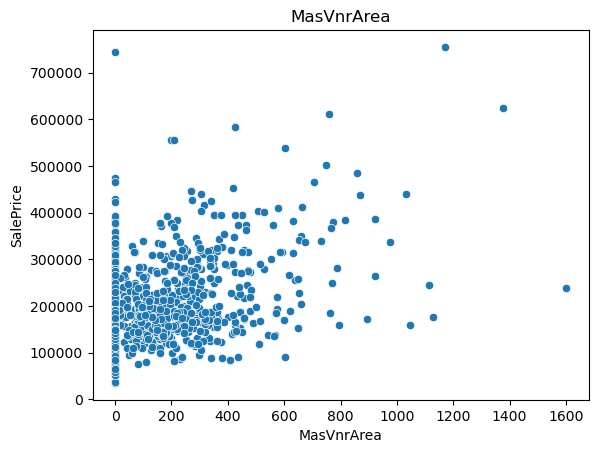

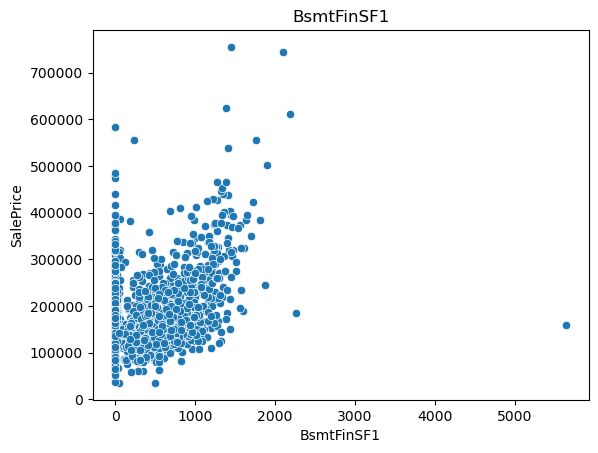

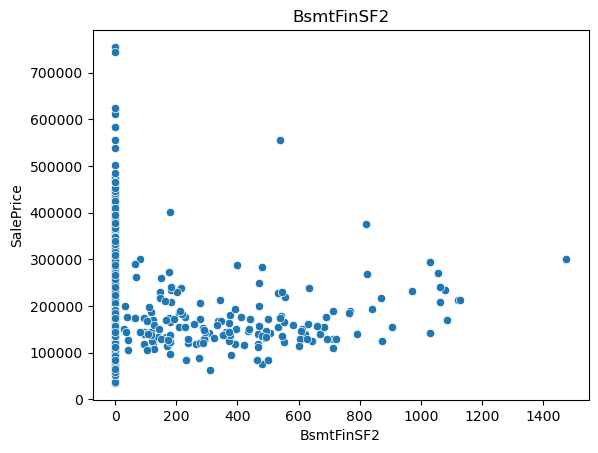

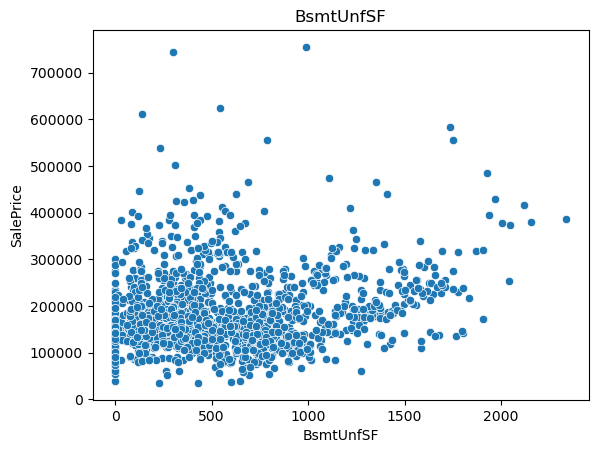

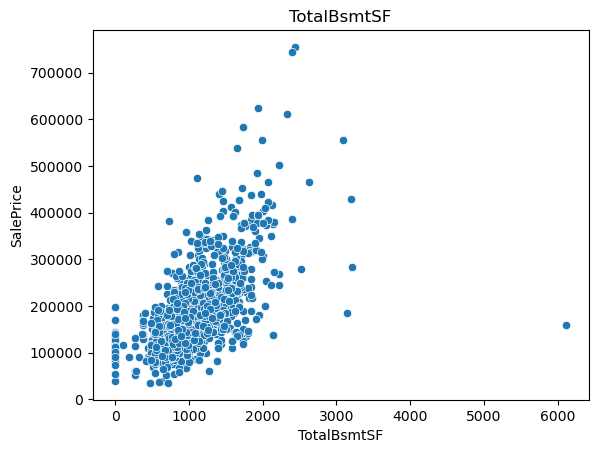

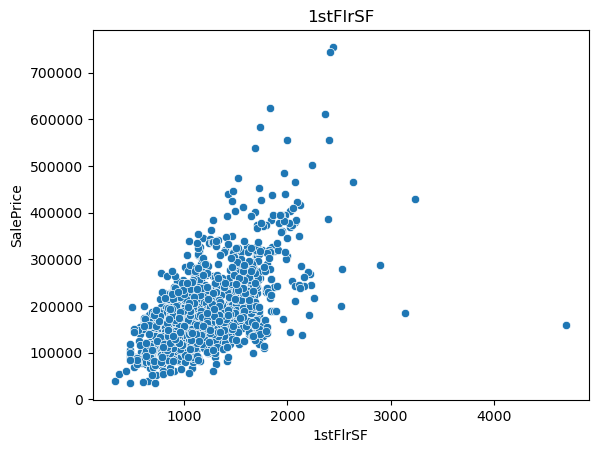

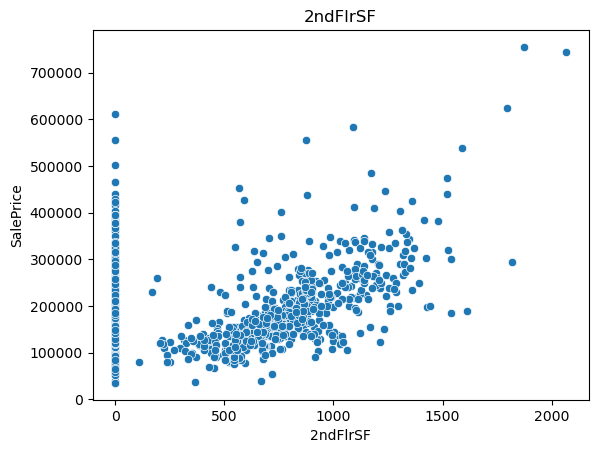

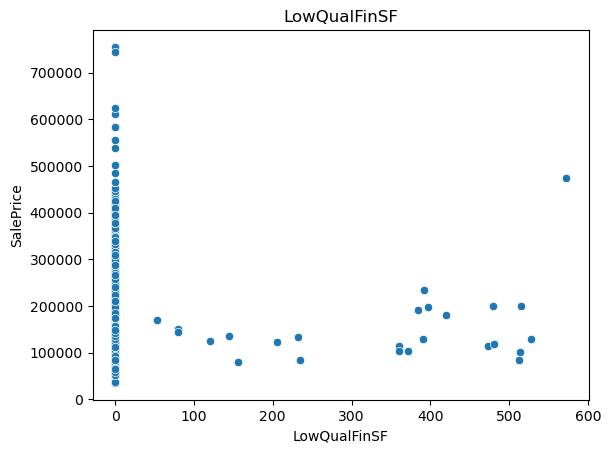

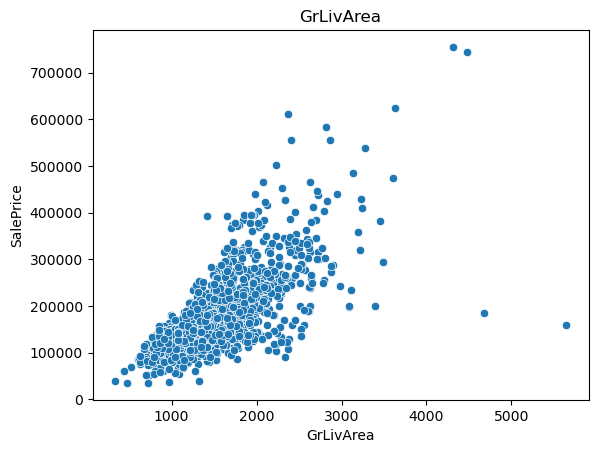

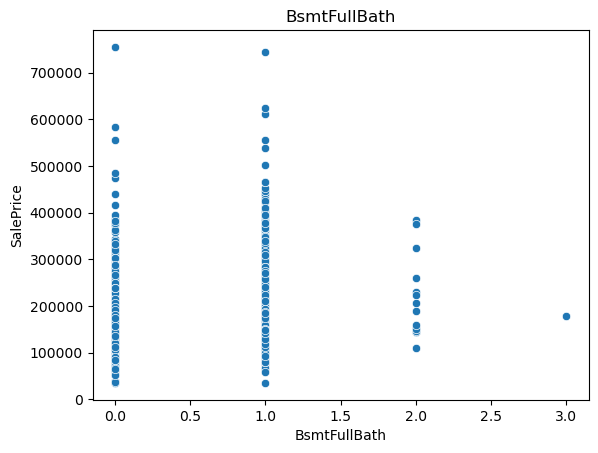

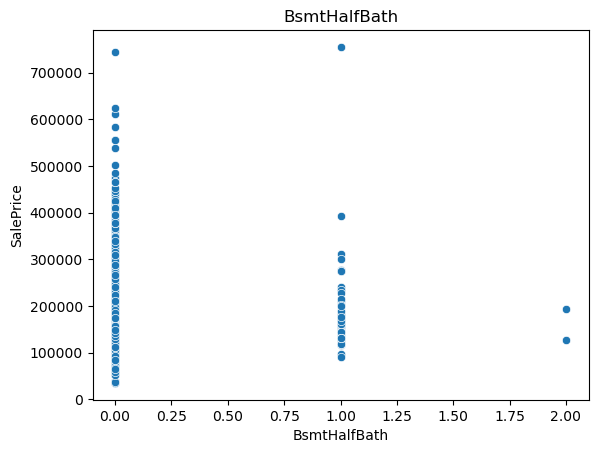

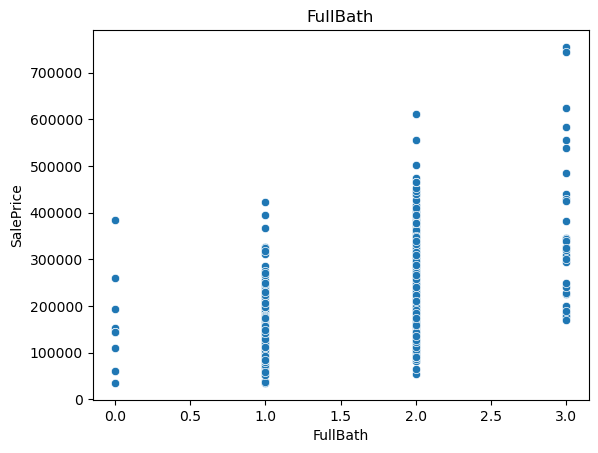

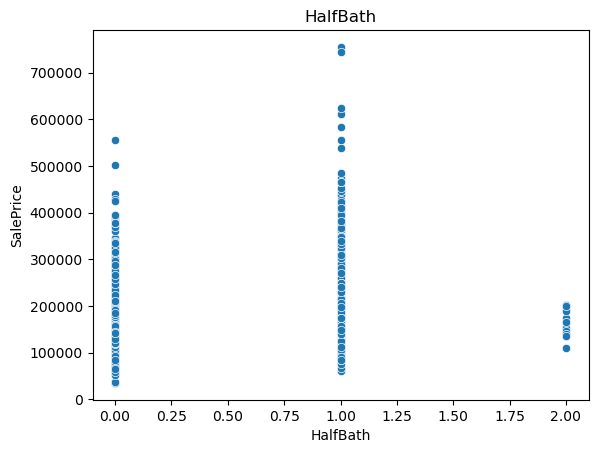

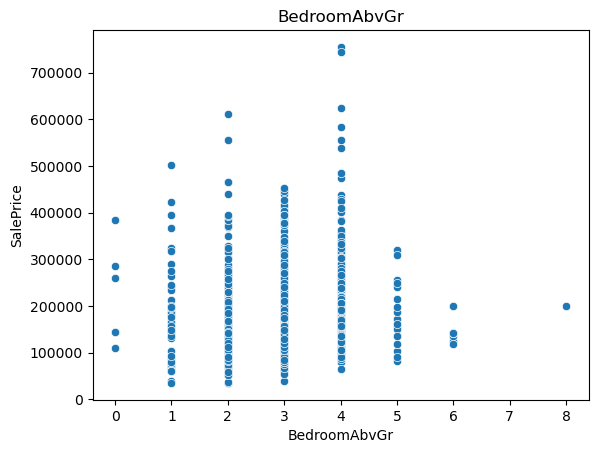

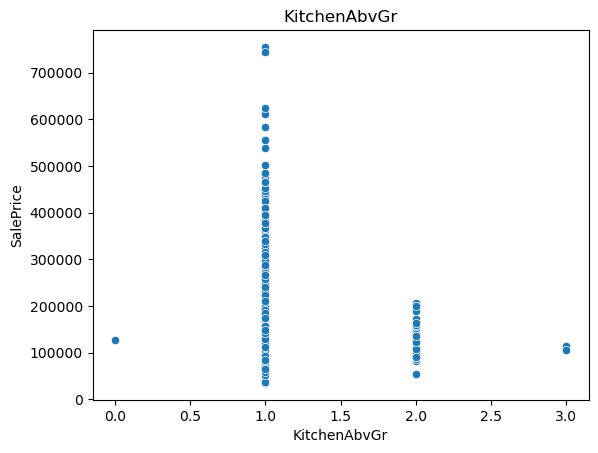

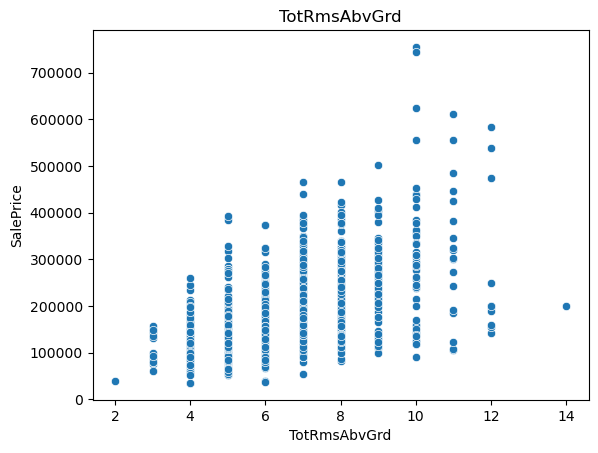

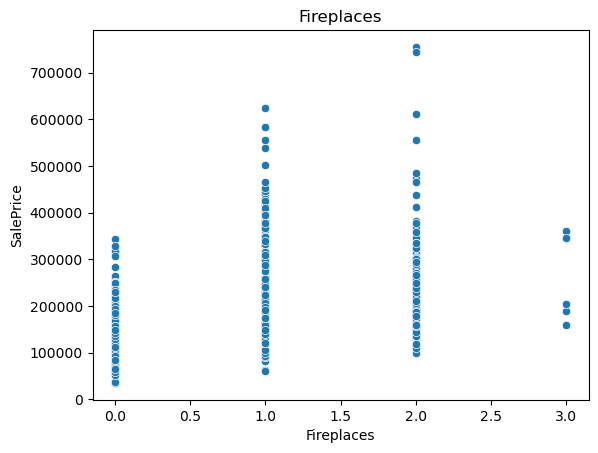

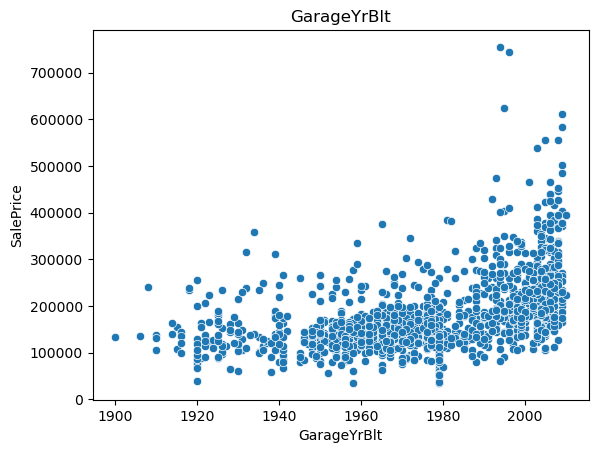

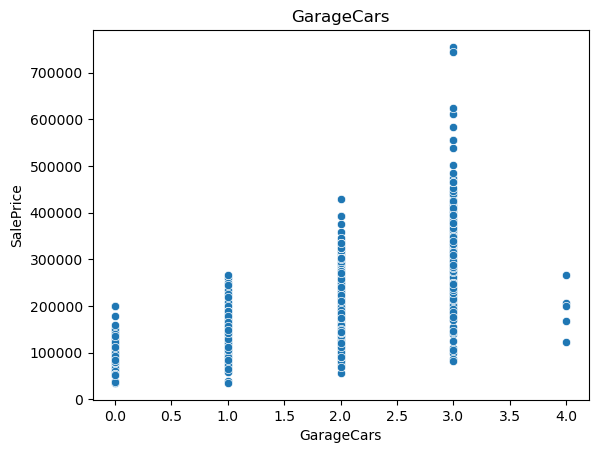

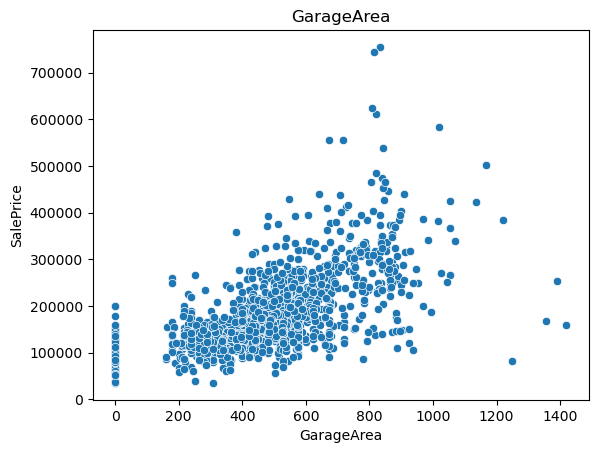

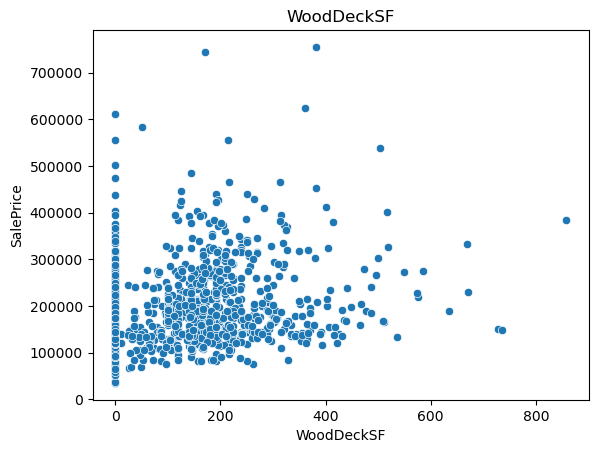

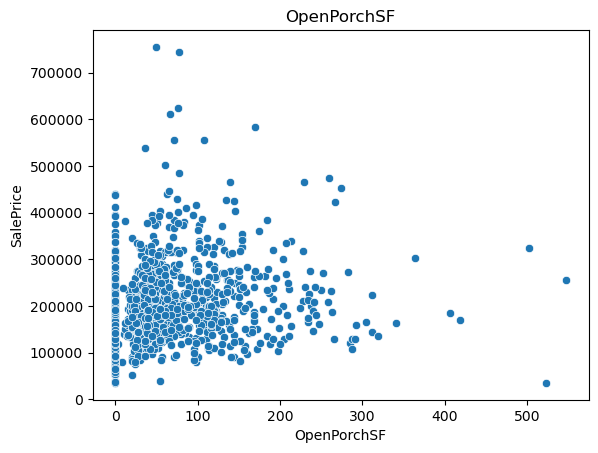

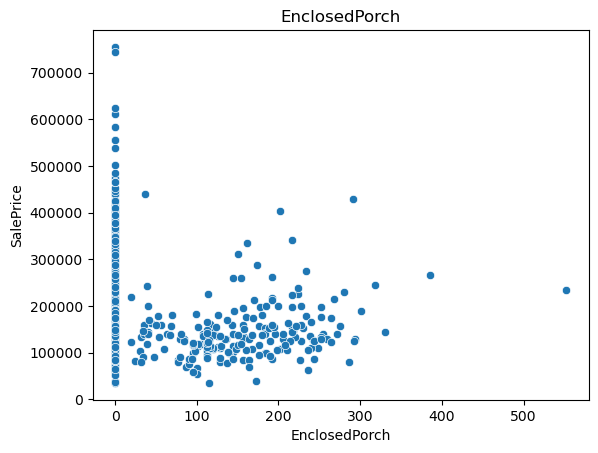

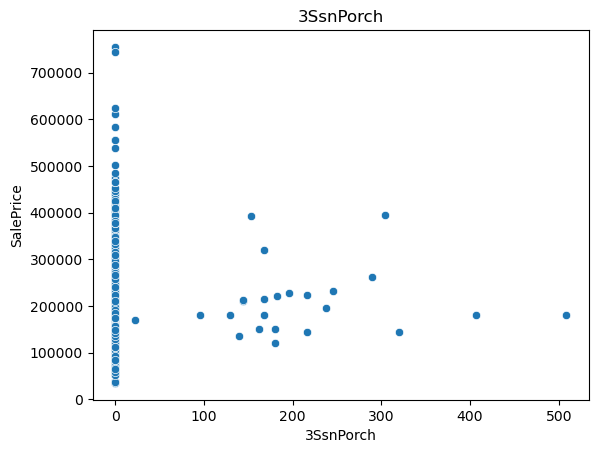

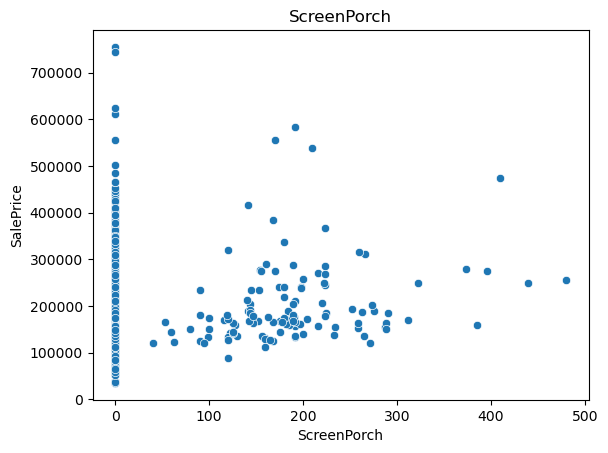

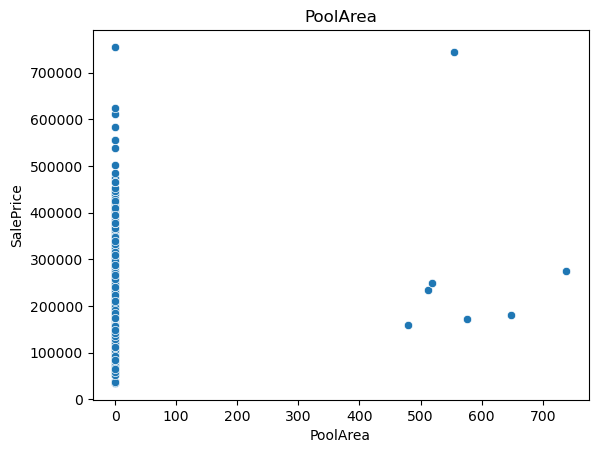

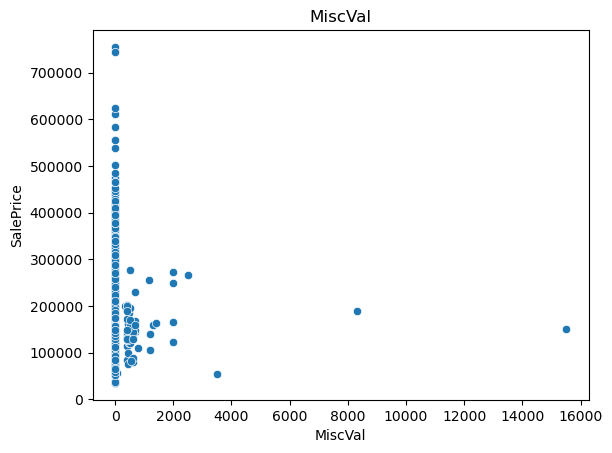

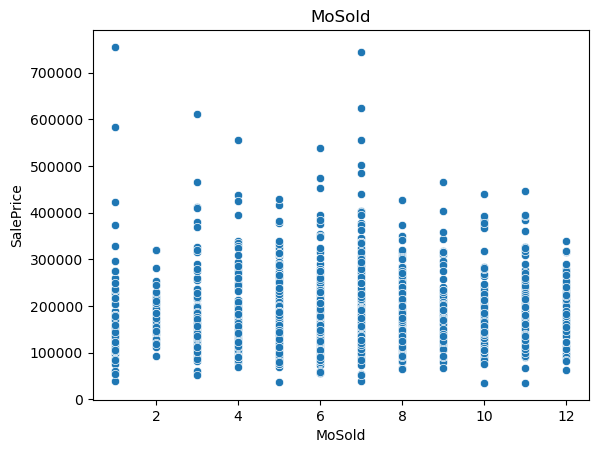

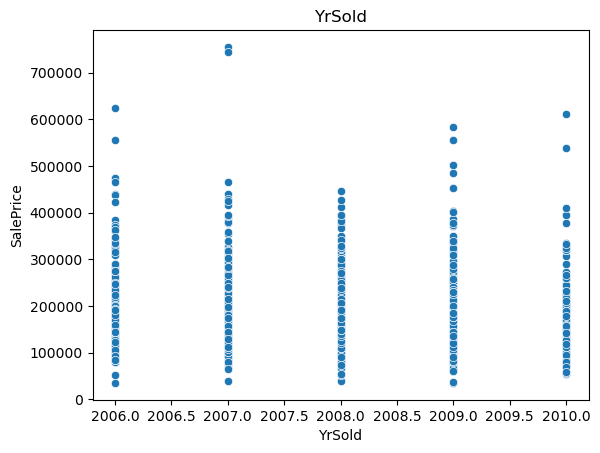

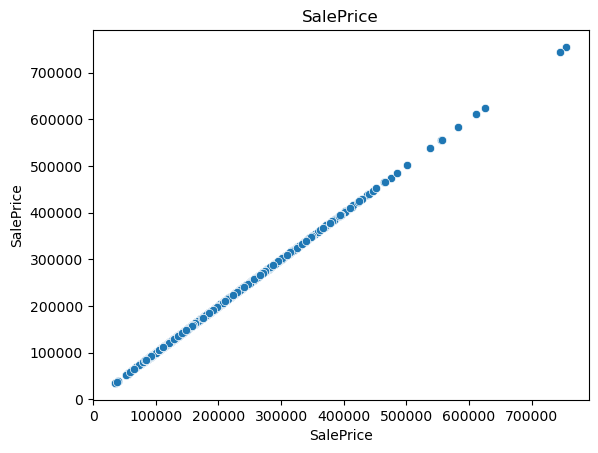

In [15]:
# Let's see the fueatures and the SalePrice relationship, Sale Price non-null values have 1460
remove_outliers = all_df[:1460]
for r in num_train:
    sns.scatterplot(data=remove_outliers,x=r,y='SalePrice').set_title(r,fontsize=12,color='Black')
    plt.show()

In [16]:
# drop outliers
# sort=False , 不對列進行排序
# zip 將多個可loop對象如list,tuple組合成一個tuple的序列
outlier_columns=['LotFrontage','MasVnrArea','BsmtFinSF1','TotalBsmtSF','1stFlrSF', 'GrLivArea','BedroomAbvGr',
                 'TotRmsAbvGrd', 'MiscVal']
outlier_threshold = [300, 1400, 5000, 6000, 4000, 4500, 8, 14, 8000]


# remove_outliers 剩下來的值,比threshold小的就不是outliers
for c,t in zip(outlier_columns,outlier_threshold):
    remove_outliers = remove_outliers[remove_outliers[c]<t]

all_df = pd.concat([remove_outliers,all_df[1460:]],sort=False).reset_index(drop=True)

In [17]:
# 面積相關的項目用log轉換,使數值接近常態分佈
for i in list(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
               'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea',
               'LotArea','PoolArea','MiscVal']):
    all_df[i] = np.log1p(all_df[i].dropna())

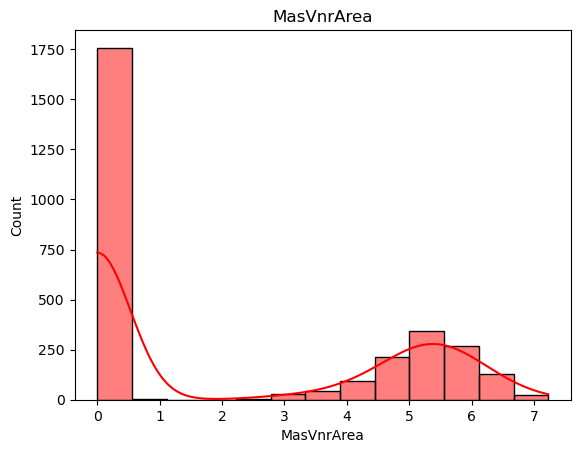

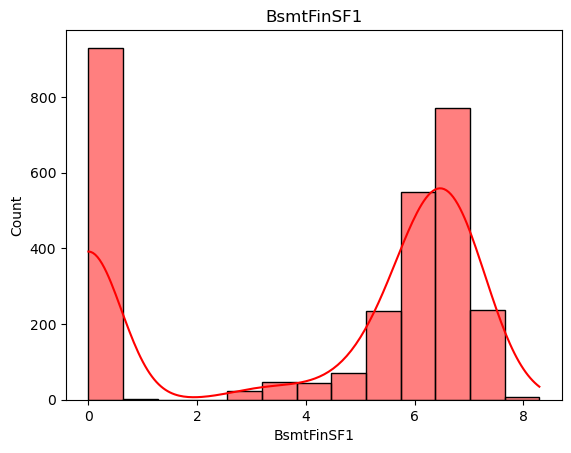

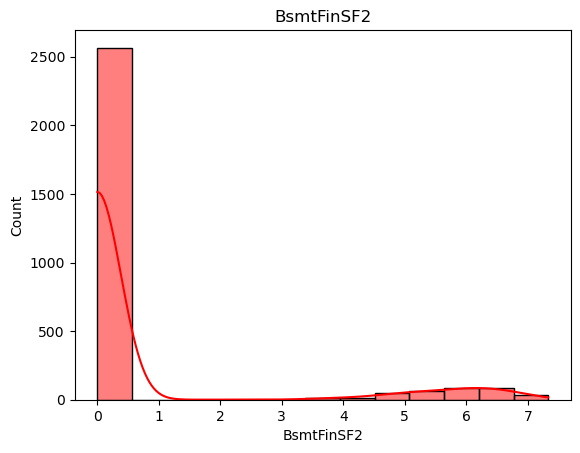

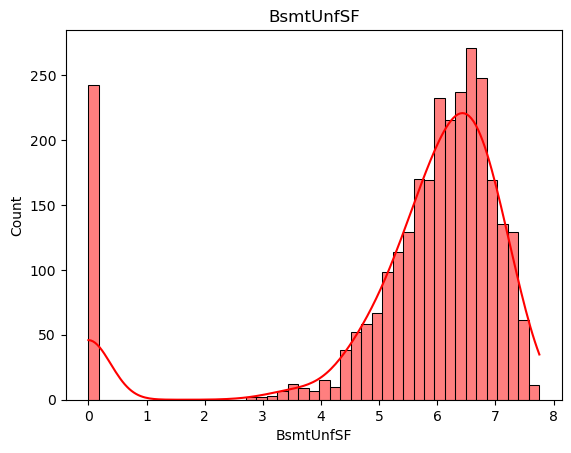

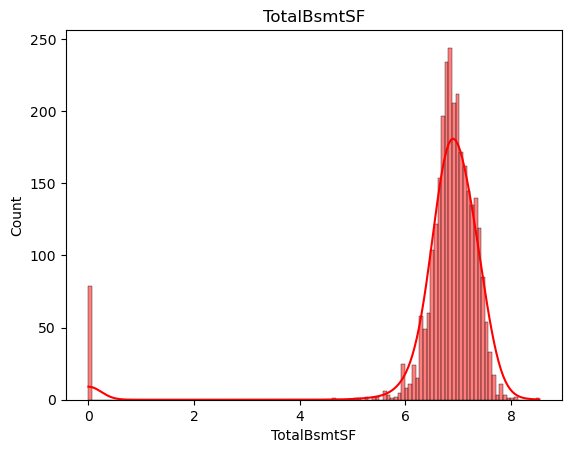

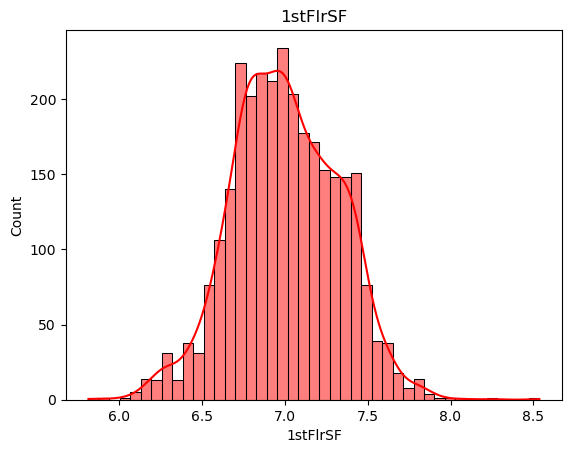

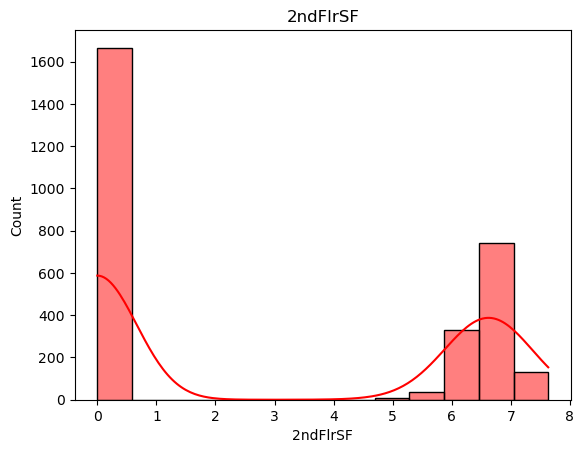

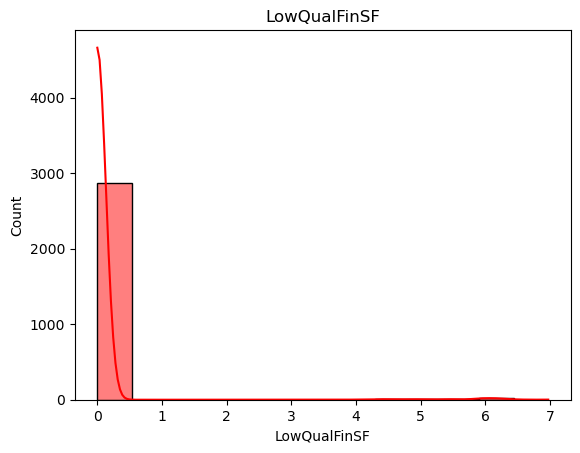

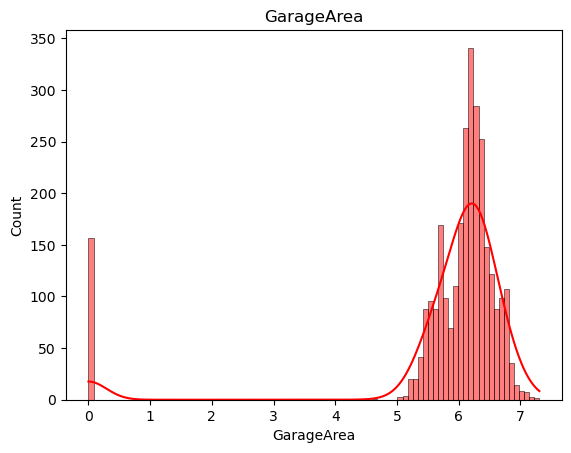

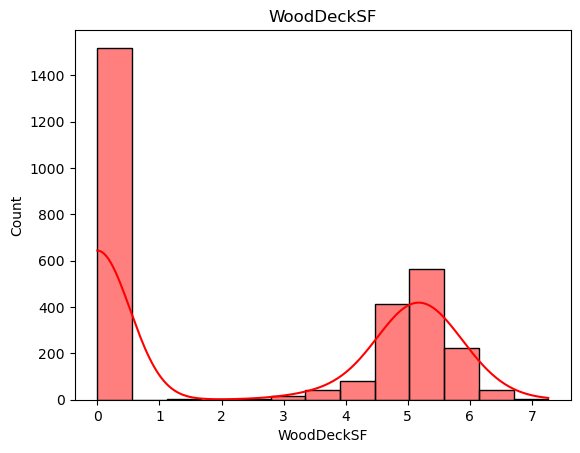

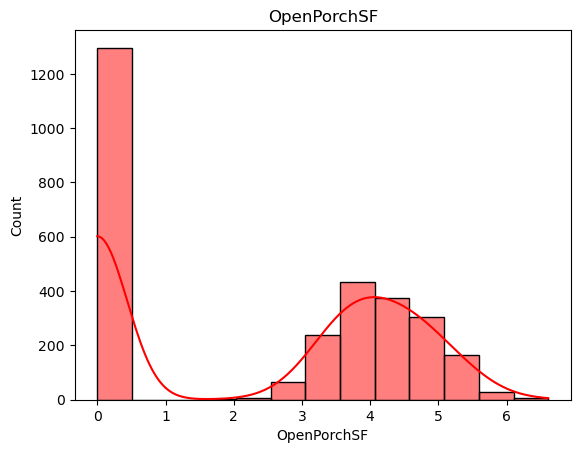

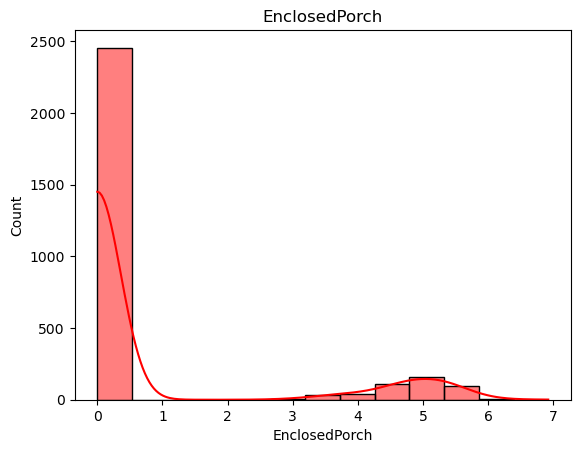

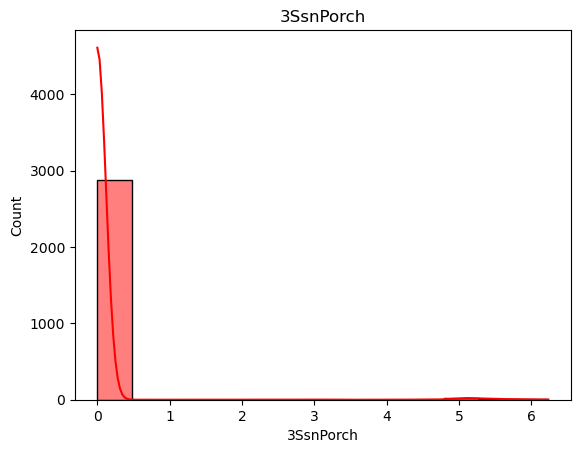

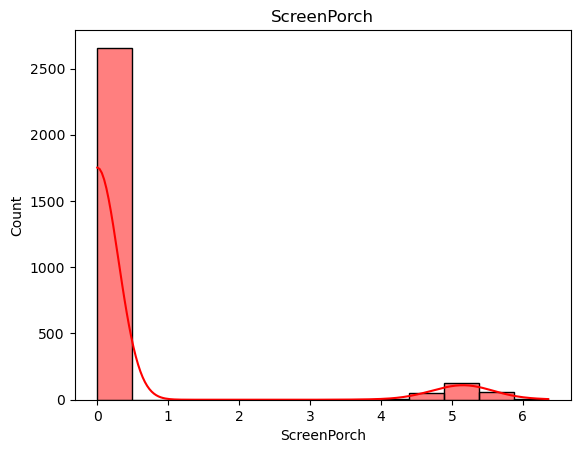

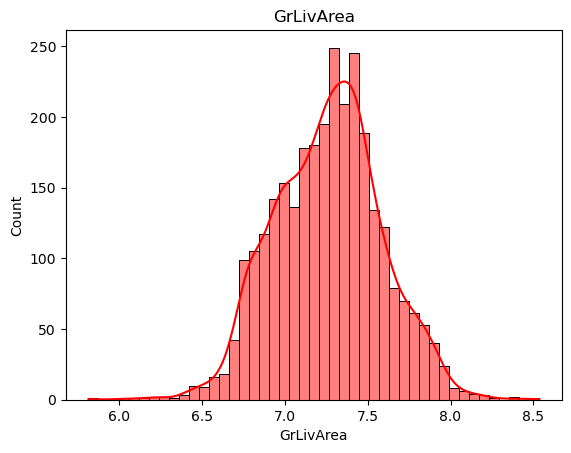

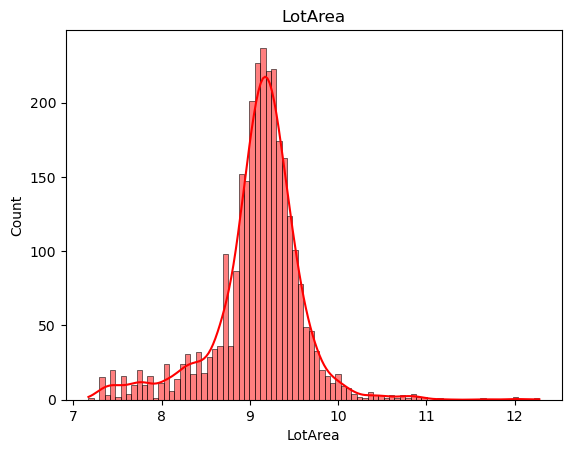

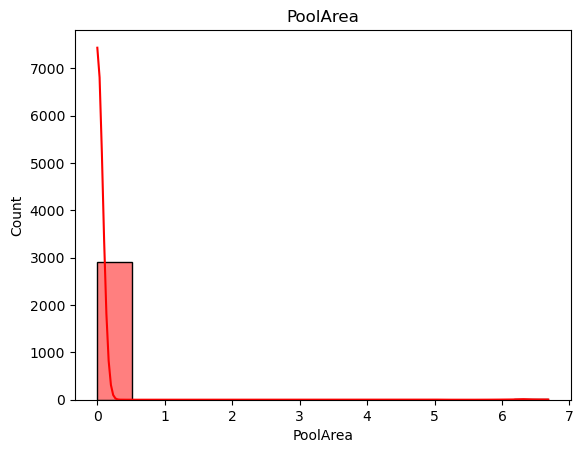

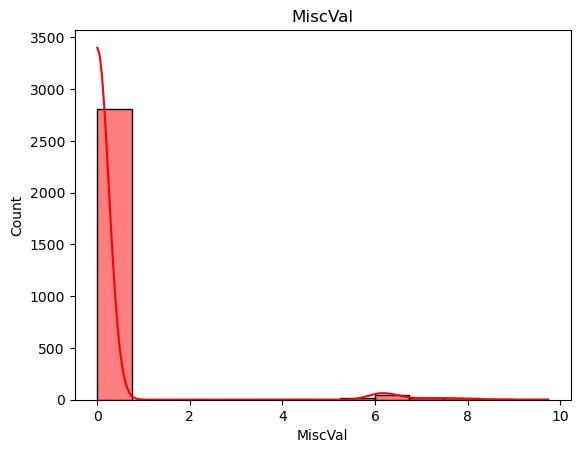

In [18]:
# visualize result
for i in list(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF',
               'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea',
               'LotArea','PoolArea','MiscVal']):
    sns.histplot(all_df[i].dropna(),color='red',kde=True).set_title(i)
    plt.show()

In [19]:
# 轉換量表型特徵,轉換成有順序的特徵
# 從好到差依序是, EX,Gd,TA,Fa,Po
for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
          'GarageQual','GarageCond']:
    all_df[i] = all_df[i].replace(['Ex','Gd','TA','Fa','Po', 'none'], [5, 4, 3, 2, 1, 0]).astype(int)

for i in ['BsmtExposure']:
    all_df[i] = all_df[i].replace(['Gd','Av','Mn','No', 'none'], [4, 3, 2, 1, 0]).astype(int)
    
for i in ['BsmtFinType1','BsmtFinType2']:
     all_df[i] = all_df[i].replace(['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','none'], [6, 5, 4, 3, 2, 1, 0]).astype(int)

In [20]:
# 可用 出售年度與建造時間來推算屋齡
# 銷售時屋齡
all_df['House_Age'] = all_df['YrSold'] - all_df['YearBuilt']

# 銷售時屋齡(整修)
all_df['Remod_Age'] = all_df['YrSold'] - all_df['YearRemodAdd']

# 車庫建造多少年
all_df['Garage_Age'] = all_df['YrSold'] - all_df['GarageYrBlt']

In [21]:
# 年月份,MSSubClass意義應為類別,故從數字轉類別
for i in ['YrSold','MoSold','MSSubClass']:
    all_df[i] = all_df[i].astype(str)

In [22]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2912 non-null   int64  
 1   MSSubClass     2912 non-null   object 
 2   MSZoning       2912 non-null   object 
 3   LotFrontage    2912 non-null   float64
 4   LotArea        2912 non-null   float64
 5   LotShape       2912 non-null   object 
 6   LandContour    2912 non-null   object 
 7   LotConfig      2912 non-null   object 
 8   LandSlope      2912 non-null   object 
 9   Neighborhood   2912 non-null   object 
 10  Condition1     2912 non-null   object 
 11  BldgType       2912 non-null   object 
 12  HouseStyle     2912 non-null   object 
 13  OverallQual    2912 non-null   int64  
 14  OverallCond    2912 non-null   int64  
 15  YearBuilt      2912 non-null   int64  
 16  YearRemodAdd   2912 non-null   int64  
 17  RoofStyle      2912 non-null   object 
 18  Exterior

In [23]:
# because 'remove_outliers' is not np.array, so need to convert to np.array first
# It will help model perform better
data_type = type(remove_outliers)
is_np_array = isinstance(remove_outliers, np.ndarray)
is_np_array

False

In [24]:
# one hot coding
df_final = pd.get_dummies(all_df)
df_final = df_final.drop('Id',axis=1).reset_index(drop=True)

# Split into features and target
X = df_final[:1453].drop('SalePrice',axis=1)
y = np.array(np.log1p(remove_outliers['SalePrice']))

Test = df_final[1453:].drop('SalePrice',axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold,RandomizedSearchCV

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Ridge Regression

In [27]:
from sklearn.linear_model import RidgeCV
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
Ridge_model = RidgeCV(cv=5,alphas=alphas)
Ridge_model.fit(X_train,y_train)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=5)

In [28]:
y_Ridge_train = Ridge_model.predict(X_train)
y_Ridge_test = Ridge_model.predict(X_test)

print('RMSE_train_Ridge = ' + str(np.sqrt(mean_squared_error(y_train,y_Ridge_train))))

print('RMSE_test_Ridge = ' + str(np.sqrt(mean_squared_error(y_test,y_Ridge_test))))

RMSE_train_Ridge = 0.09698107669335197
RMSE_test_Ridge = 0.11994029797761027


## Lasso Regression

In [29]:
from sklearn.linear_model import LassoCV

# eps越小收斂的數值越小,可提升模型精度
Lasso_model = LassoCV(eps=0.001,cv=5,n_alphas=100)
Lasso_model.fit(X_train,y_train)

LassoCV(cv=5)

In [30]:
y_Lasso_train = Lasso_model.predict(X_train)
y_Lasso_test = Lasso_model.predict(X_test)

print('RMSE_train_Lasso = ' + str(np.sqrt(mean_squared_error(y_train,y_Lasso_train))))

print('RMSE_test_Lasso = ' + str(np.sqrt(mean_squared_error(y_test,y_Lasso_test))))

RMSE_train_Lasso = 0.12822427728044997
RMSE_test_Lasso = 0.14299043921210858


## ElasticNet Regression

In [31]:
from sklearn.linear_model import ElasticNetCV
alphas=[0.0001,0.001,0.01,0.1,1,10,100]
l1ratio = [0.1, 0.5, 0.9, 0.95, 0.99, 1]
ElasticNet_model = ElasticNetCV(cv=5,alphas=alphas,l1_ratio=l1ratio,max_iter=1000000)
ElasticNet_model.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=5,
             l1_ratio=[0.1, 0.5, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [32]:
y_ElasticNet_train = ElasticNet_model.predict(X_train)
y_ElasticNet_test = ElasticNet_model.predict(X_test)

print('RMSE_train_ElacticNet' + str(np.sqrt(mean_squared_error(y_train,y_ElasticNet_train))))
print('RMSE_test_ElasticNet' + str(np.sqrt(mean_squared_error(y_test,y_ElasticNet_test))))

RMSE_train_ElacticNet0.09867063974043776
RMSE_test_ElasticNet0.11831073932225608


## 上面三個方法主要在防止模型Overfitting, RMSE差異不大,Overfitting的機率不高, RMSE用來衡量模型預測值與實際值的差異,數值越小越好

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
# rfr = RandomForestRegressor()
# n_estimators = [100,200,300,1000]
# max_depth = [7,8,9,10]
# min_samples_split = [2,3,4,5]
# min_samples_leaf = [2,3,4]
# max_features = ['sqrt','log2']

# param_grid = {'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,
             #'min_samples_leaf':min_samples_leaf,'max_features':max_features}

# Grid_CV = GridSearchCV(rfr,param_grid,cv=3,scoring='neg_root_mean_squared_error',n_jobs=-1)
# Grid_CV.fit(X_train,y_train)

# Grid_CV.best_params_
# {'max_depth': 10,'max_features': 'sqrt','min_samples_leaf': 2,'min_samples_split': 2,'n_estimators': 100}

In [35]:
rfr = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=2,min_samples_leaf=2,max_features='sqrt')
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2)

In [36]:
rfr_train = rfr.predict(X_train)
rfr_test = rfr.predict(X_test)

print('RMSE_rfr_train' + str(np.sqrt(mean_squared_error(y_train,rfr_train))))
print('RMSE_rfr_test' + str(np.sqrt(mean_squared_error(y_test,rfr_test))))

RMSE_rfr_train0.09298805925678774
RMSE_rfr_test0.15091057457252488


## XGBRegressor

In [37]:
from xgboost import XGBRegressor

In [38]:
# xgb_r = XGBRegressor()
# params = {
    # 'n_estimators': list(range(100, 500, 100)),
    # 'max_depth': list(range(2, 6, 1)),
    # 'learning_rate':[0.001,0.01,0.1,1],
    # 'colsample_bytree': [0.1,0.2,0.3]}

# Grid_CV = GridSearchCV(xgb_r,param_grid=params,cv = 5,scoring = 'neg_root_mean_squared_error',n_jobs = -1)
# Grid_CV.fit(X_train, y_train)

# Grid_CV.best_params_
# {'colsample_bytree': 0.3,
# 'learning_rate': 0.1,
# 'max_depth': 2,
# 'n_estimators': 400}

In [39]:
xgb_r = XGBRegressor(n_estimators=400,learning_rate=0.1,max_depth=2,colsample_bytree=0.3,base_score=0.5,
                    gamma=0,reg_lambda=1,reg_alpha=1,scale_pos_weight=1,subsample=1,
                    min_child_weight=1,booster='gbtree',n_jobs=1)

xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=1, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [40]:
xgb_r_train = xgb_r.predict(X_train)
xgb_r_test = xgb_r.predict(X_test)

print('RMSE_xgb_r_train' + str(np.sqrt(mean_squared_error(y_train,xgb_r_train))))
print('RMSE_xgb_r_test' + str(np.sqrt(mean_squared_error(y_test,xgb_r_test))))

RMSE_xgb_r_train0.0871663286591063
RMSE_xgb_r_test0.12307816546496679


## Voting, Stacking, Blending

為了提高模型預測的性能與減少Overfitting的風險。

1. Voting: 通過多個模型的預測結果或取平均來得到最終結果。

2. Stacking: 將多個模型預測結果作為新特徵再次輸入給模型訓練,利用不同模型的優勢提高預測能力。

3. Blending: 混合泛化是將不同模型的預測值，根據不同的權重，形成新的預測值，其中各模型的權重總和需為1。若是每個模型的權重相同，也就是取平均的概念，又可以稱為投票泛化(Voting)。 Ex: 模型1*權重1 + 模型2*權重2 + 模型3*權重3 … = 合成結果


## Voting

In [41]:
from sklearn.ensemble import VotingRegressor
vote_model = VotingRegressor([('Ridge', Ridge_model),('Lasso', Lasso_model),('ElasticNet', ElasticNet_model),
              ('RandomForestRegressor', rfr),('XGBRegressor', xgb_r)])

vote = vote_model.fit(X_train,y_train.ravel())
vote_pred_train = vote.predict(X_train)
vote_pred_test = vote.predict(X_test)

print('RMSE_vote_train' + str(np.sqrt(mean_squared_error(y_train,vote_pred_train))))
print('RMSE_vote_test' + str(np.sqrt(mean_squared_error(y_test,vote_pred_test))))

RMSE_vote_train0.0928694100907846
RMSE_vote_test0.1216521558898549


## Stacking

In [43]:
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
# gbr is meta_regressor
# use_features_in_secondary=True, use meta_regressor to fit原始特徵以及基礎模型的預測結果。
# use .values in X_train,X_test to avoid warning
gbr=GradientBoostingRegressor(learning_rate=0.05,
                               max_leaf_nodes=3,
                              n_estimators=100)
stack_r = StackingRegressor(regressors=[Ridge_model,Lasso_model,ElasticNet_model,rfr,xgb_r],
                           meta_regressor=gbr,use_features_in_secondary=True)

stack_r.fit(X_train.values,y_train.ravel())
stack_pred_train = stack_r.predict(X_train.values)
stack_pred_test = stack_r.predict(X_test.values)

print('RMSE_stack_train' + str(np.sqrt(mean_squared_error(y_train,stack_train))))
print('RMSE_stack_test' + str(np.sqrt(mean_squared_error(y_test,stack_test))))

RMSE_stack_train0.07208638695326587
RMSE_stack_test0.126562117023779


## Blending

In [64]:
weight = list(np.linspace(0.1, 1, 91))

RMSE_train = []
RMSE_test = []

for i in weight:
    blending_pred_train = (i * vote_pred_train) + ((1 - i) * stack_pred_train)
    blending_pred_test = (i * vote_pred_test) + ((1 - i) * stack_pred_test)
    
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, blending_pred_train)))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, blending_pred_test)))

blending_output = pd.DataFrame({'weight': weight, 'RMSE_train': RMSE_train, 'RMSE_test': RMSE_test})
print(blending_output.sort_values('RMSE_test', ascending=True).head(10))

    weight  RMSE_train  RMSE_test
76    0.86    0.089062   0.121465
77    0.87    0.089327   0.121466
75    0.85    0.088798   0.121466
78    0.88    0.089593   0.121469
74    0.84    0.088535   0.121470
79    0.89    0.089860   0.121473
73    0.83    0.088274   0.121475
80    0.90    0.090128   0.121480
72    0.82    0.088013   0.121482
81    0.91    0.090397   0.121488


In [65]:
best_weight = blending_output.loc[blending_output['RMSE_test'].idxmin()]
print(best_weight)

weight        0.860000
RMSE_train    0.089062
RMSE_test     0.121465
Name: 76, dtype: float64
